# **Project description**

*   The Playstore apps data has enormous potential to drive app-making businesses to success.
* Actionable insights can be drawn for developers to work on and capture the Android market.  
*   Each app(row) has values for category,ratings,size and more.Another dataset contains customer reviews of android apps.
*   Explore and analyze the data to discover key factors responsible for app engagement and success.


**1.**   **Play store data (main dataset)**:
  **This contains data on the Google Play applications. It has 10,841 rows of data which has following columns.**

**App Category**: Category of the app. This could be beauty, business, medical,art and design entertainment, education,family...etc.

**Rating**: It has How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews**: number of user reviews each app has received.

**Size**: The memory size needed to install the application.

**Installs**: The number of times each application has been installed by users.

**Type**: Whether the app is free or a paid app.

**Price**: The price of the app.

**Content** Rating: This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

**Genres**: The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.

**Last Updated**: Release date of the most recent update for the app.

**Current Ver**: The app's current version.

**Android Ver**: The oldest version of Android OS supported by the app.


---



**2.** **Sentiment Analysis**:
**This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:**

**App** : Name of the app.

**Translated_Review**: Either the original review in English, or a translated version if the orignal review is in another language.

**Sentiment**: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

**Sentiment_Polarity**: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

**Sentiment_Subjectivity**: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.



In [ ]:
# This Python 3 environment comes with many helpful analytic libraries
# For example, here are several helpful packages to load
# importing necessary libraries for future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from google.colab import files
%matplotlib inline

In [ ]:
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
# importing the data from the drive and reading the csv file.
df1= pd.read_csv('/content/Play Store Data.csv')
df2=pd.read_csv('/content/User Reviews.csv')

In [ ]:
#let's check the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**So this information gives us an idea about the data types of rows and columns.**

**Data cleaning**

*  Data cleaning is one of the most essential subtask of any data science project. Although it can be a very tedious process, it's worth should never be undermined.
*  By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs,Price and Size have a few special characters (+ , $ ,M , k) .This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].

*  Hence, we now proceed to clean our data. Specifically, the special characters "," and "+" present in Installs column and "$" present in Price column need to be removed.

*  It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the info() method to acheive this.

In [ ]:
#checking if null values are present 
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**There are 1474 null values in the rating column.**

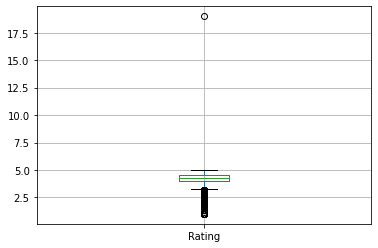

In [ ]:
#Checking for outlier in the Rating column
df1.boxplot('Rating')

**There is an outlier in Rating column because rating cannot be greater than 5.0**

In [ ]:
#Checking for the row in which the outlier is present 
#Rating cannot be greater than 5.0
df1[df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# As we can see there is  an error in row 10472 so lets remove it
df1=df1.drop(10472)

In [ ]:
#filling all null values in 'Rating' column with median.
df1['Rating'].fillna(df1['Rating'].median(),axis=0,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**Correcting data types**
*  From the previous task we noticed that Installs,Reviews,Size and Price were categorized as object data type. This is because these columns originally had mixed input types: digits and special characters.

*  The features that we will be working with most frequently henceforth are Installs, Size,Reviews, Rating and Price. While Rating is a float (i.e. purely numerical data types), we still need to work on Installs,Size,Reviews and Price to make them numeric.

In [ ]:
# function to convert whole column in one format
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
df1.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

df1["Size(Mb)"]=df1["Size(Mb)"].map(lambda x: format(x))
# Replace "M" with an empty string 
df1["Size(Mb)"]=df1["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [ ]:
# replace "$" sign and using "astype()" to convert the "price" column into float
df1["Price"]=df1["Price"].str.replace("$","")

In [ ]:
# lets replace  "+" and "," it with an empty string
df1["Installs"]=df1["Installs"].str.replace("+","").str.replace(",","")

In [ ]:
# Change the data type to float
df1["Reviews"]=pd.to_numeric(df1["Reviews"])
df1["Installs"]=df1["Installs"].astype(float)
df1["Price"]=df1["Price"].astype(float)
df1["Size(Mb)"]=df1["Size(Mb)"].astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size(Mb)        9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 931.6+ KB


**As the datatype of all columns is correct, so we can move ahead.**

In [ ]:
#let's drop the unwanted columns
df1.drop(['Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

**Exploratory data analysis**
*  With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

*  let's move to the visualization part.

**Observation 1**
*  **We will try different visualization techniques to visualize the data given in our datasets.**

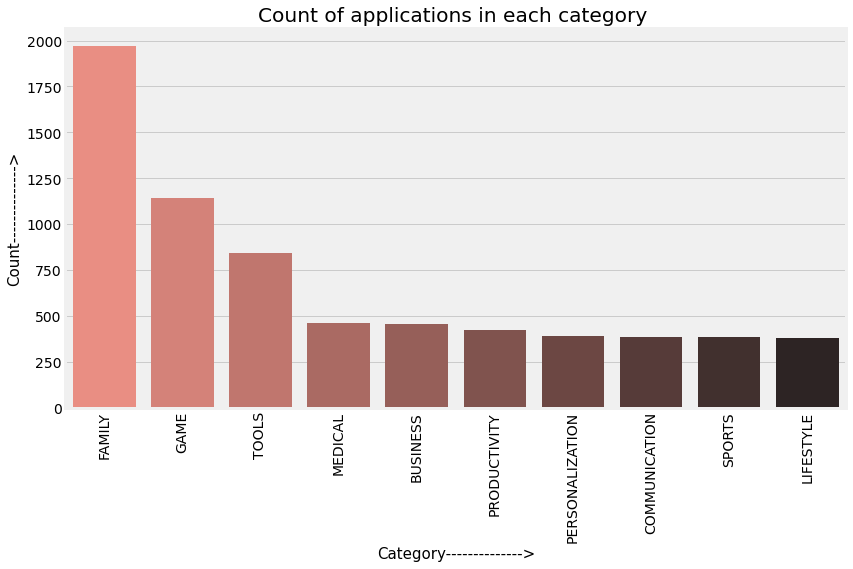

In [ ]:
# ploting countplot for "Category" column
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.countplot('Category',data=df1,
              order=df1.Category.value_counts().head(10).index,palette="dark:salmon_r")
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Count-------------->", fontsize=15)
plt.title("Count of applications in each category ")
plt.xticks(rotation=90)
plt.show();

*  Now we know that the 'Family' and 'Game' category rules the play store market, followed by Tools, Medical, and Business. Okay Cool ..... Data Analytics will understand our daily requirements and fill the market with similar apps.


**Observation 2**

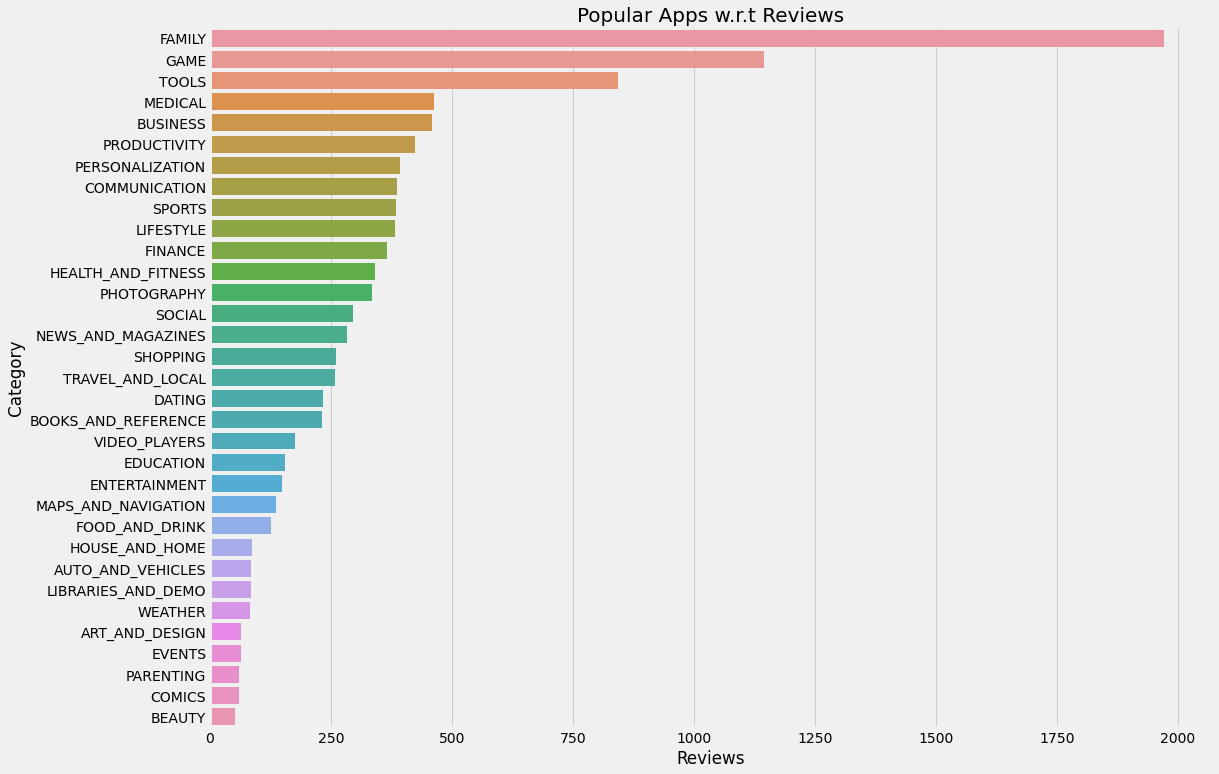

In [ ]:
#plotting barplot for visualizing apps reviews w.r.t Category
apps_category = df1.Category.value_counts();
plt.figure(figsize=(16, 12));
sns.barplot(apps_category, apps_category.index);
plt.ylabel('Category');
plt.xlabel('Reviews');
plt.title('Popular Apps w.r.t Reviews', Size = 20);
plt.show();

*  **From above barplot we can see that there are total 33 different categories in the dataset.**
*  **The most popular apps are from 'Family' and 'Games' category. The least reviews are for the apps from 'Beauty' and 'Comics' Category.**

In [ ]:
# Creating Dataframe for category wise app installs.
highest_installs_df =df1.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
#creating for loop for creating a list of app categories and no of installs
number_of_installs = []
app_category = []

for i in range(len(highest_installs_df)):
    number_of_installs.append(highest_installs_df.Installs[i])
    app_category.append(highest_installs_df.index[i])

In [ ]:
print(number_of_installs)

[35086024415.0, 32647276251.0, 14176091369.0, 14069867902.0, 11452771915.0, 10258263505.0, 10088247655.0, 7496317760.0, 6868887146.0, 6222002720.0, 3247848785.0, 2869160000.0, 2325494782.0, 1921469576.0, 1751174498.0, 1583072512.0, 1001914865.0, 876648734.0, 871452000.0, 724281890.0, 537643539.0, 426100520.0, 273898751.0, 264310807.0, 168712461.0, 124338100.0, 62995910.0, 56086150.0, 53257437.0, 53130211.0, 31521110.0, 27197050.0, 15973161.0]


In [ ]:
app_category

['GAME',
 'COMMUNICATION',
 'PRODUCTIVITY',
 'SOCIAL',
 'TOOLS',
 'FAMILY',
 'PHOTOGRAPHY',
 'NEWS_AND_MAGAZINES',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'SHOPPING',
 'ENTERTAINMENT',
 'PERSONALIZATION',
 'BOOKS_AND_REFERENCE',
 'SPORTS',
 'HEALTH_AND_FITNESS',
 'BUSINESS',
 'FINANCE',
 'EDUCATION',
 'MAPS_AND_NAVIGATION',
 'LIFESTYLE',
 'WEATHER',
 'FOOD_AND_DRINK',
 'DATING',
 'HOUSE_AND_HOME',
 'ART_AND_DESIGN',
 'LIBRARIES_AND_DEMO',
 'COMICS',
 'MEDICAL',
 'AUTO_AND_VEHICLES',
 'PARENTING',
 'BEAUTY',
 'EVENTS']

**Observation 3**
**Let's see which apps are most installed Category wise.**

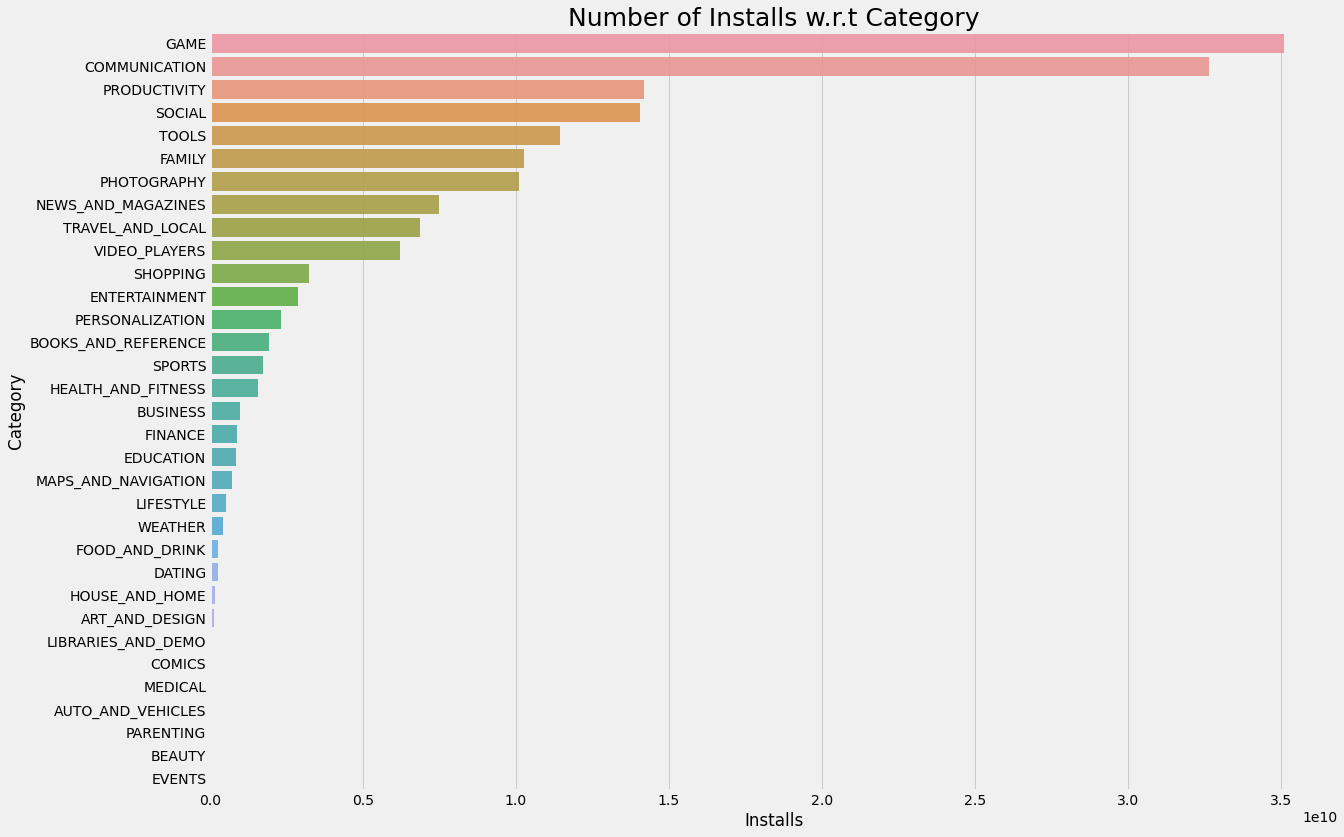

In [ ]:
# Plotting barplots for visualize apps category w.r.t. number of installs.
plt.figure(figsize=(18,13))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = number_of_installs, y = app_category, alpha =0.9)
graph.set_title("Number of Installs w.r.t Category", fontsize = 25);

**From the above plot we can see that most of the apps has been installed from 'Game' and 'Communication' category.**

**Observation 4**

**Let's see which apps from GAME category are most installed.**

In [ ]:
# created function for getting top apps w.r.t category
def top_apps_in_category(str):
    top = df1[df1['Category'] == str]
    top_apps = top.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(12,8))
    plt.title('Top Installed Apps(GAME)',size = 20)    
    graph = sns.barplot(x = top_apps.App, y = top_apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

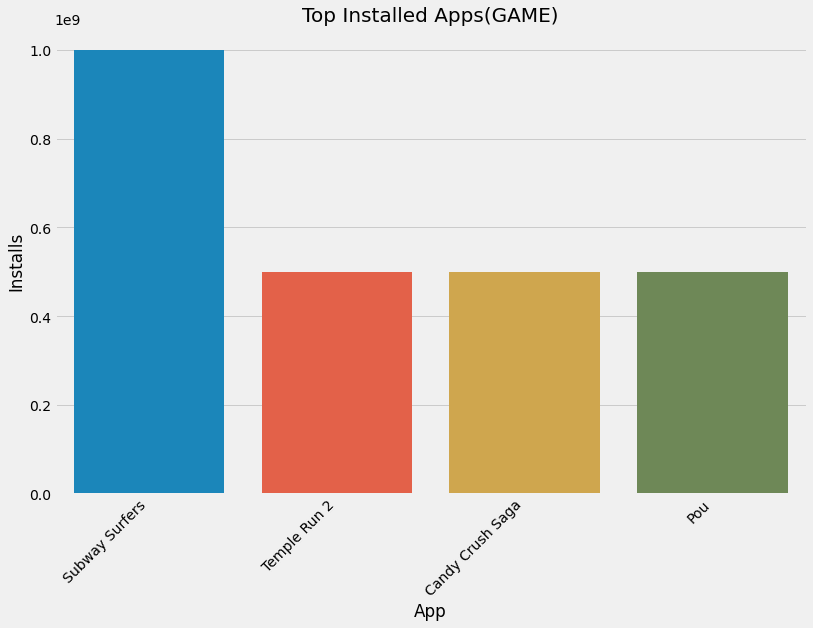

In [ ]:
# Top apps for game Category
top_apps_in_category('GAME')

**From the above plot we can see that the most installed games from the 'Game' Category are 'Subway Suffers', 'Temple Run 2', 'Candy Crush Saga' and 'Pou'.**

**Observation 5**

#**Let's find correlation between the columns.**

In [ ]:
#finding the correlation 
df1.corr()

,Rating,Reviews,Size(Mb),Installs,Price
Rating,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238215,0.643122,-0.009667
Size(Mb),0.083734,0.238215,1.000000,0.164787,-0.023006
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023006,-0.011689,1.000000


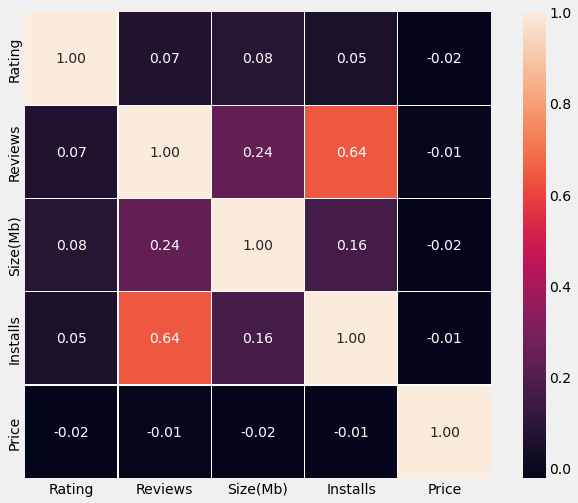

In [ ]:
#Heatmap for checking the correlation between the columns of dataset
fig, axes =plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(),ax=axes,annot=True,linewidths=0.1,fmt='.2f',square=True)
plt.show()

**From the above heatmap we can see that the 'Reviews' and 'Installs' columns has most correlation.**

**Observation 6**

* **Let's create a barplot of count of applications in each category differentiated by their type.**

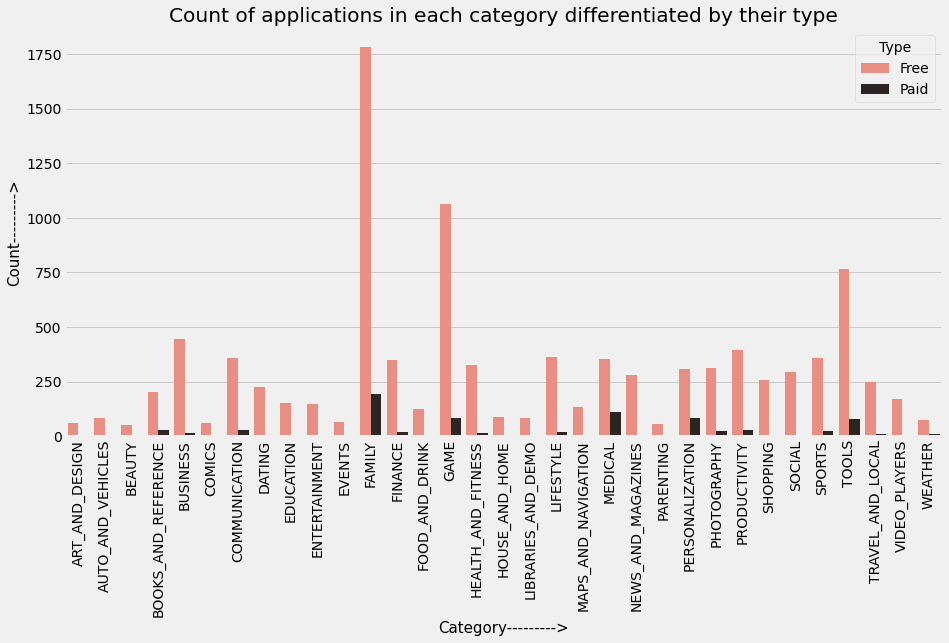

In [ ]:
scene_3=df1.groupby(["Category","Type"])["App"].count().reset_index()
point_3=pd.DataFrame(scene_3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="App",hue="Type",data=point_3,palette="dark:salmon_r")
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

* **It looks like certain app categories have more free apps available for download than others. In our story, the majority of apps in the Family, Game, and Tools categories were free to install.**
* **At the same time Family, Medical, Tools, and Game categories had the biggest number of paid apps available for download.**

**Observation 7**

* **Let's create a barplot for visualizing number of Installs in each category differentiated by their type.**

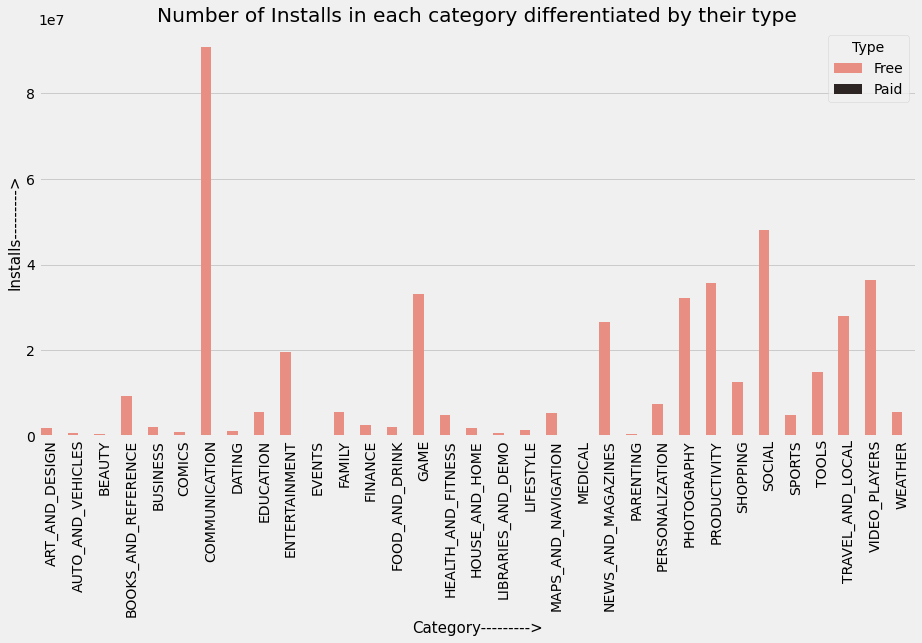

In [ ]:
scene3=df1.groupby(["Category","Type"]).agg({"Installs":"mean"}).reset_index()
point3=pd.DataFrame(scene3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="Installs",hue="Type",data=point3,palette="dark:salmon_r")
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Installs--------->", fontsize=15)
plt.title("Number of Installs in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

**It can be concluded that the number of free applications installed by the user is high when compared with the paid ones.**

**Observation 8**
* **let's create a countplot for visualizing the comparison of content rating.**

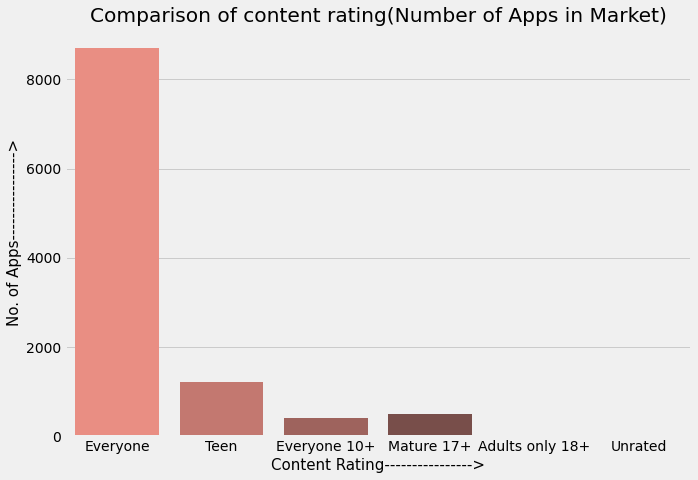

In [ ]:
# we are using countplot to show the counts of content Rating
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.countplot("Content Rating",data=df1,palette="dark:salmon_r")
plt.xlabel("Content Rating---------------->",fontsize=15)
plt.ylabel("No. of Apps---------------->",fontsize=15)
plt.title("Comparison of content rating(Number of Apps in Market)")
plt.show();

**From the above plot we can see that most of the content ratings are from 'Everyone' Category.**

**Observation 9**
* **Histogram representing distribution of Size.**

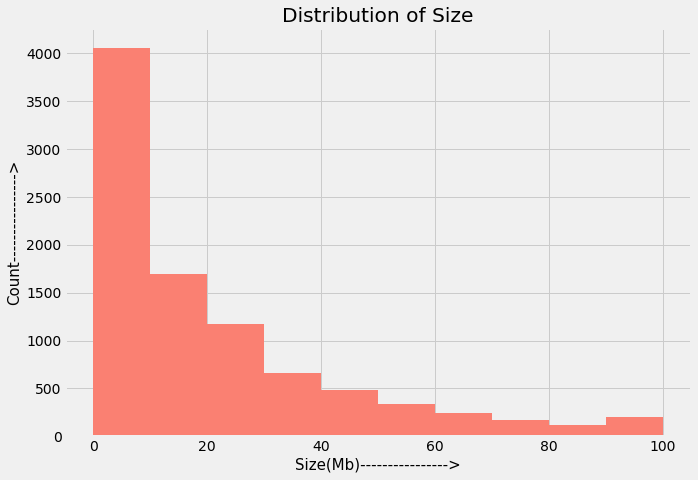

In [ ]:
# Histogram
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.hist(df1['Size(Mb)'],color="salmon")
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("Count---------------->",fontsize=15)
plt.title("Distribution of Size")
plt.show();

* **As we can see as the size of the app goes on increasing the number of counts goes on decreasing.**

**Observation 10**
* **lets create a scatterplot showing how is the distribution of installs as the size of app increases.**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


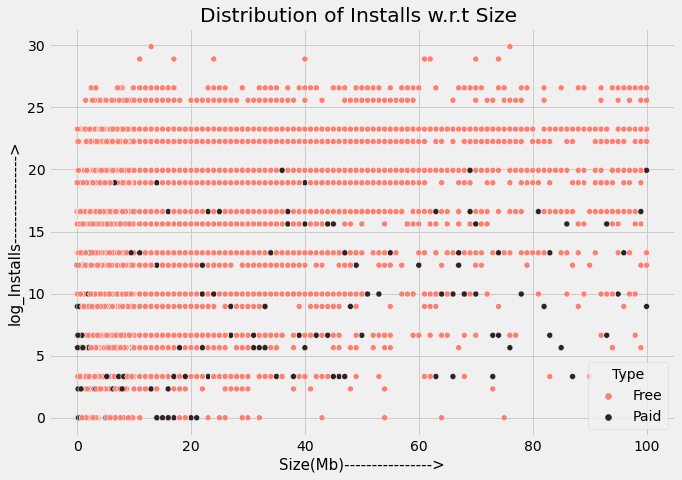

In [ ]:
'''As we can notice,there is a high variance in the number of installs. 
To remove this we are adding a new column to dataframe, which is the log of number of installs'''
df1['log_installs'] = np.log2(df1['Installs'])
# Scatter-plot
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.scatterplot(df1['Size(Mb)'],df1['log_installs'],hue=df1["Type"],palette="dark:salmon_r")
plt.xlabel("Size(Mb)---------------->",fontsize=15)
plt.ylabel("log_Installs---------------->",fontsize=15)
plt.title("Distribution of Installs w.r.t Size ")
plt.show();

**From the above scatter plot we can see that as the size increases the number of installs is less.**

**Observation 11**
* **pie chart showing the percentage of free apps vs paid apps.**

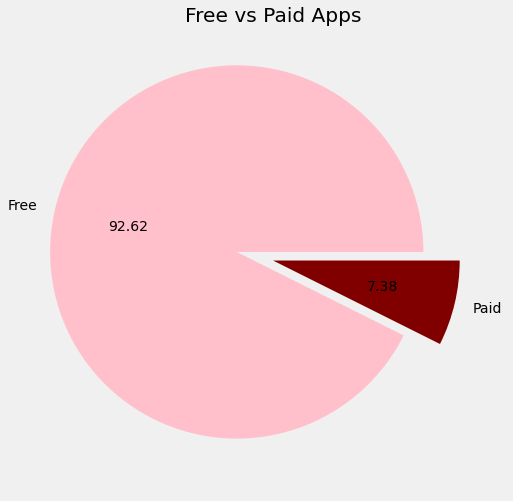

In [ ]:
# percentage of free vs paid apps available on playstore
plt.subplots(figsize=(12,8))
Free_vs_paid = df1.groupby('Type').size()
colors = ["pink","maroon"]
explode = (0.2,0)
plt.pie(Free_vs_paid, explode=explode, colors=colors,labels=['Free','Paid'],autopct='%.2f')
plt.title('Free vs Paid Apps')
plt.show()

**From above piechart we can see that 92% apps are free while 8% are paid apps on playstore.**



#**SENTIMENT ANALYSIS**
**This file contains the result of the sentiment analysis conducted by the dataset creator. It has 64,295 rows of data with the following columns:**

* App : Name of the app.

* Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

* Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral or Negative.

* Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive). Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e. it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

* Sentiment_subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [ ]:
#loading the data of user reviews
df2=pd.read_csv('/content/User Reviews.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


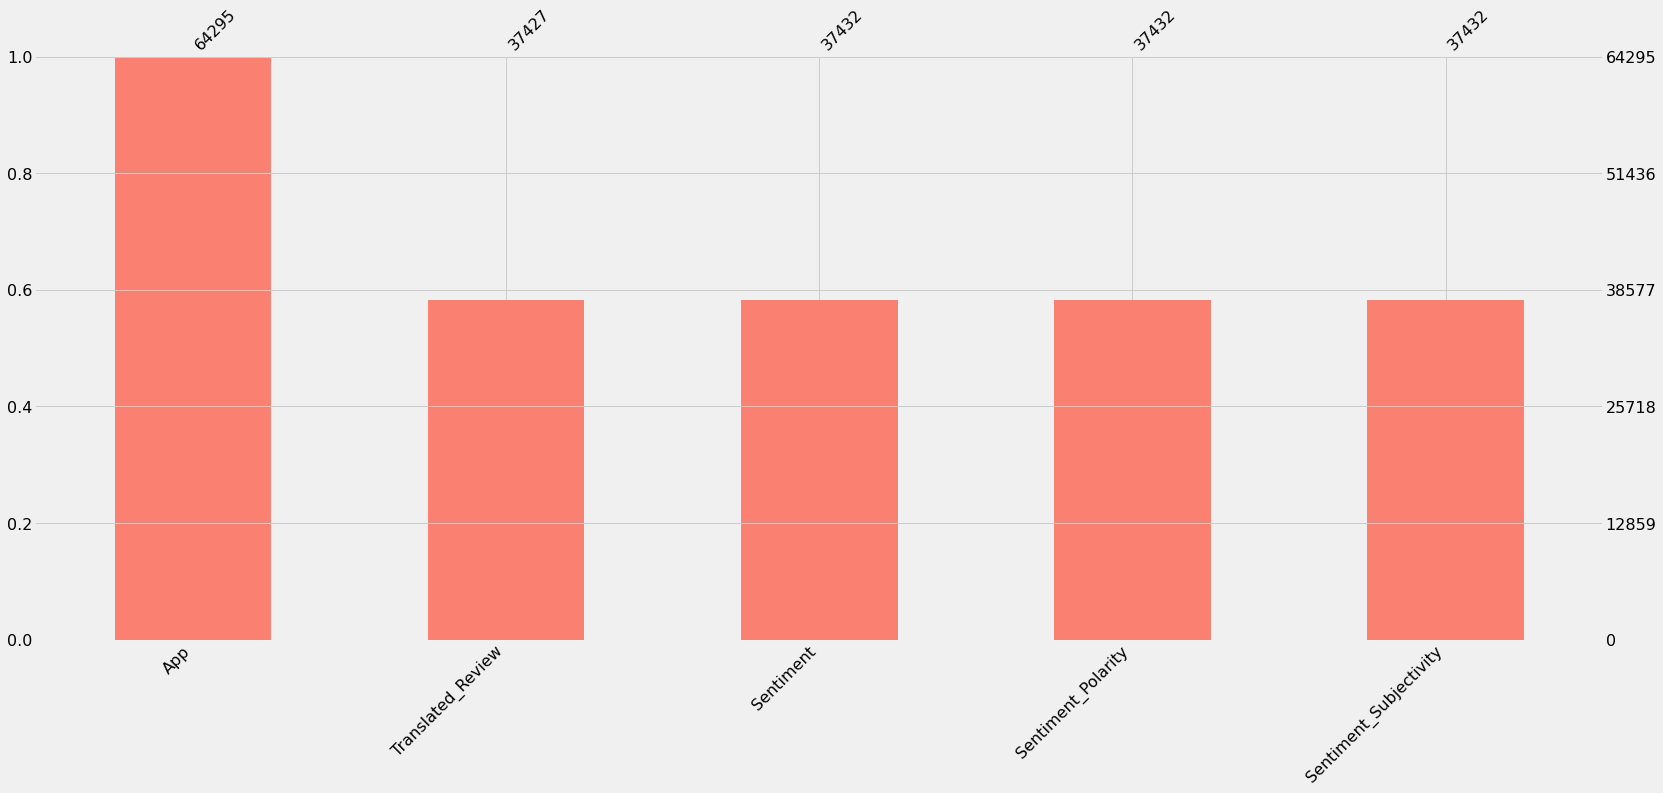

In [ ]:
# We are using missingno lib to visualise missing values of our dataset
import missingno as msno
#msno.matrix(dataset)
msno.bar(df2,color="salmon")

**From the above chart we can conclude that there are null values present in the Translated_Review, Sentiment,Sentiment_polarity and Sentiment_subjectivity columns.**

In [ ]:
# Dropped null values present in the user_reviews data frame
df2.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'], inplace=True)

In [ ]:
# Merge reviews dataset with apps using inner joint
merge_df = pd.merge(df2,df1,on='App',how='inner')

In [ ]:
merge_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size(Mb),Installs,Type,Price,Content Rating,Genres,log_installs
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,18.931569
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,18.931569
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,18.931569
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,18.931569
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,18.931569


**Observation 12**
* **pie chart representing percentage of Review Sentiments.** 

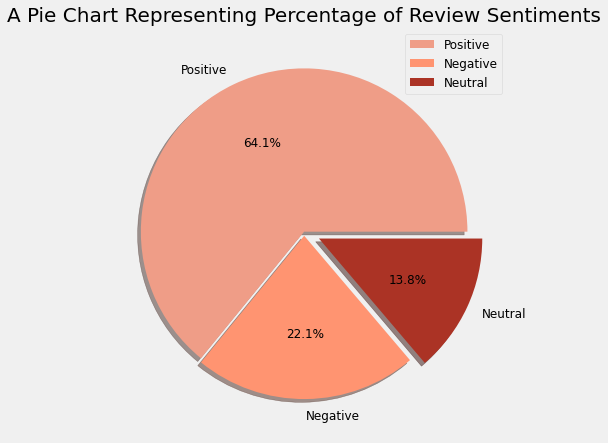

In [ ]:
#Piechart for comparing positive , negative and neutral reviws
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
slices=df2.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
colors = ['#EF9D87','#FF9471','#AB3325']
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

**It can be seen from above chart that positive reviews are more than negative reviews.**

In [ ]:
#Let's create category sentiment using group by method
category_sentiment = merge_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
category_sentiment

,Category,Sentiment,Sentiment Count,log_sentiment_count
0,ART_AND_DESIGN,Negative,61,5.930737
1,ART_AND_DESIGN,Neutral,62,5.954196
2,ART_AND_DESIGN,Positive,259,8.016808
3,AUTO_AND_VEHICLES,Negative,17,4.087463
4,AUTO_AND_VEHICLES,Neutral,36,5.169925
...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,5.857981
95,VIDEO_PLAYERS,Positive,190,7.569856
96,WEATHER,Negative,33,5.044394
97,WEATHER,Neutral,35,5.129283


**Observation 13**
* **Let's create a barplot representing the sentiment count w.r.t each Category.**

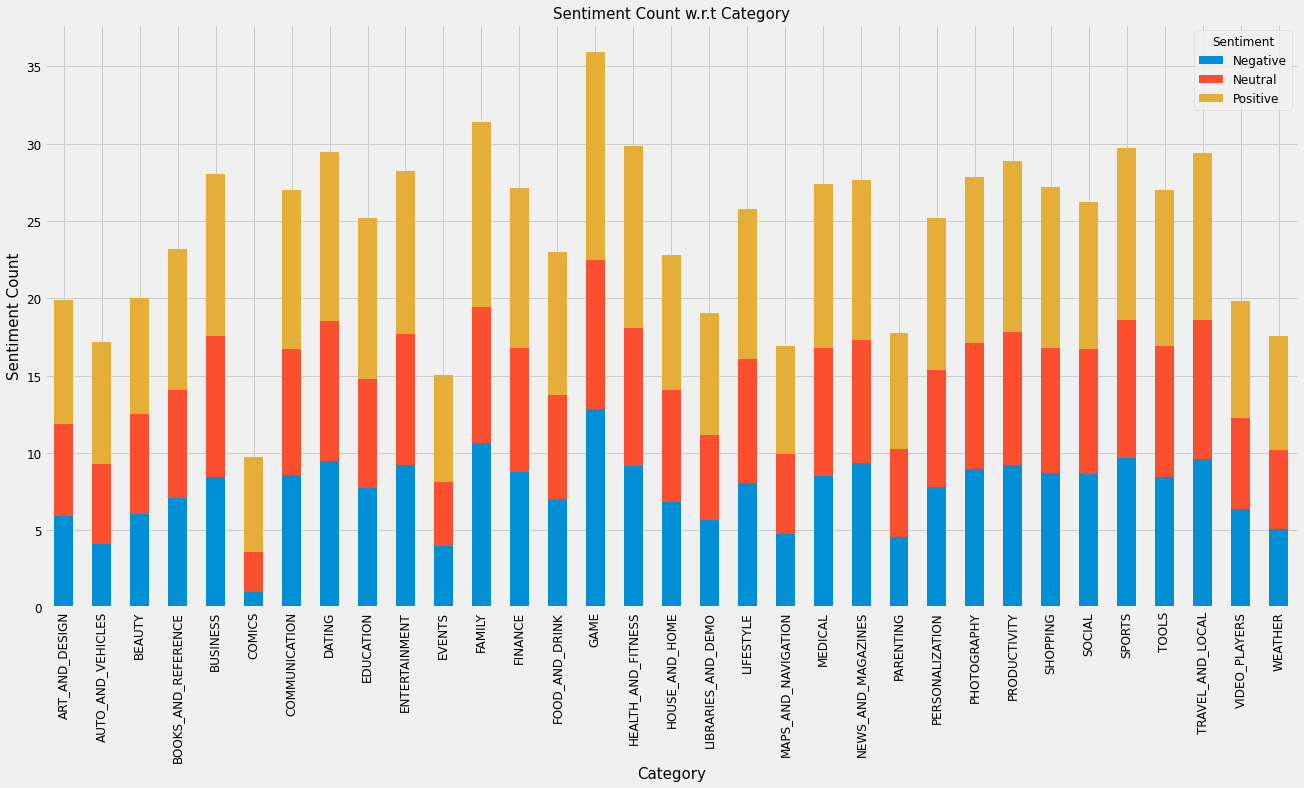

In [ ]:
# Sentiment Count of applications in each category differentiated by their type
df_sentiment = category_sentiment.pivot('Category','Sentiment','log_sentiment_count').reset_index()
df_sentiment.set_index('Category').plot(kind='bar',stacked=True,figsize=(20,10))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Sentiment Count", fontsize=15)
plt.title("Sentiment Count w.r.t Category",size = 15)
plt.show()

**Positive sentiment count is more for many apps than negative count.**

**Observation 14**

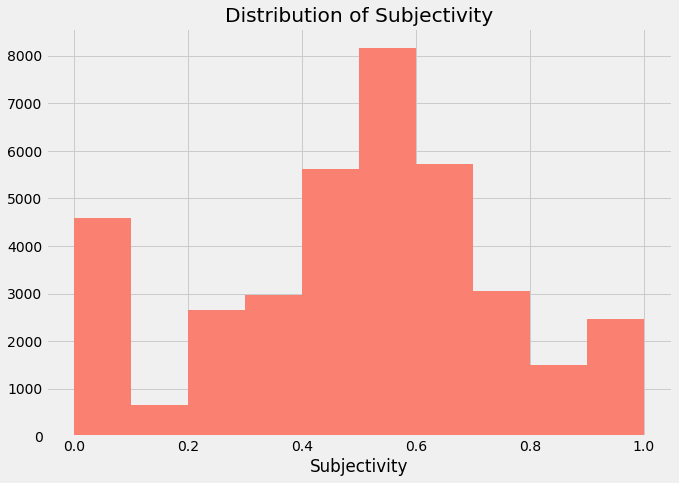

In [ ]:
#Let's see the distribution of Subjectivity
#Histogram
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(df2.Sentiment_Subjectivity.values,color="salmon")
plt.show();

*  **It can be seen that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.**
*  **The higher subjectivity means that the text contains personal opinion rather than factual information.**
*  **Sentiment_Subjectivity > 0.5(refers to that mostly it is public opinion and not a piece of factual information)**

**Observation 15**

In [ ]:
free_apps = merge_df[merge_df["Type"] == "Free"]
paid_apps = merge_df[merge_df["Type"] == "Paid"]

In [ ]:
print("Free apps - sentiment percentage\n{}".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("\n")
print("Paid Apps - Sentiment Percentage \n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free apps - sentiment percentage
Positive    63.446250
Negative    25.089456
Neutral     11.464294
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


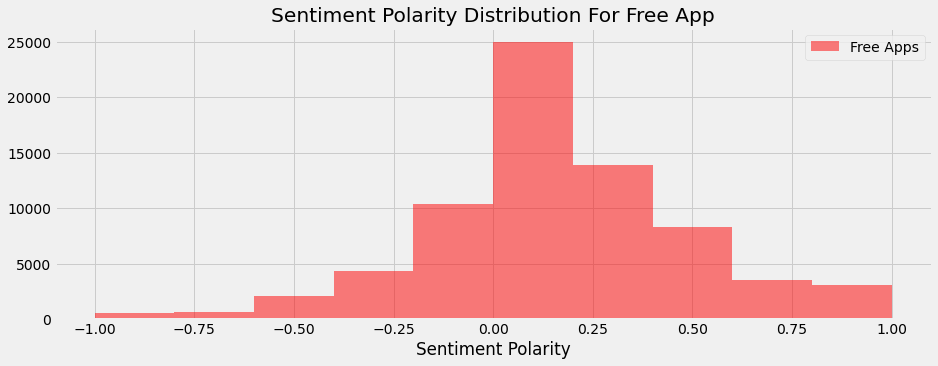

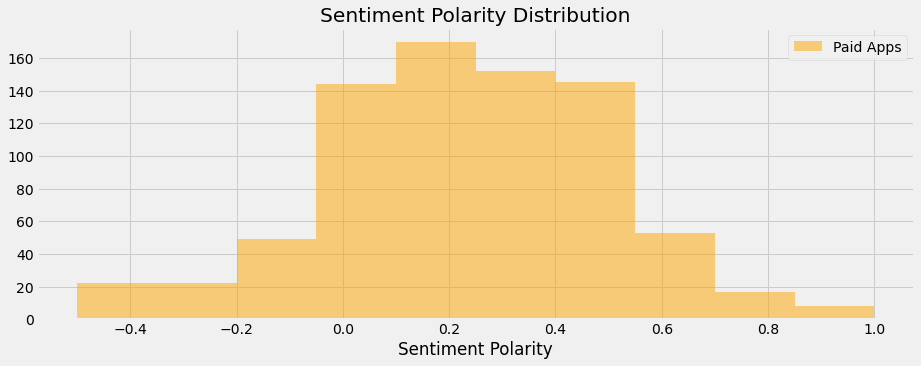

In [ ]:
plt.figure(figsize=(14,5))
plt.hist(free_apps["Sentiment_Polarity"], color="red",alpha=.5, label="Free Apps")
plt.title('Sentiment Polarity Distribution For Free App')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()
print("\n")
plt.figure(figsize=(14,5))
plt.hist(paid_apps["Sentiment_Polarity"], color="orange",alpha=.5, label="Paid Apps")
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

* **paid apps have positive sentiment polarity as compared to free apps.**
* **While free apps have neutral sentiment polarity.**

**SUMMARY**
* Most reviews are for category of 'Family' and 'Game'.

* Most installed apps are from 'GAME' and 'COMMUNICATION' Category.

* Top installed games are 'Subway Surfers','Candy Crush Saga', 'Temple Run 2'and 'Pou'.

* Free apps have more number of Ratings than the paid apps.

* Paid apps have more positive user reviews than the free apps while free apps have more number of negative reviews than paid apps.

* Positive sentiment percentage for paid apps is more than the free apps.

**REFERENCE**

* https://www.geeksforgeeks.org
* https://www.stackoverflow.com
* https://www.w3schools.com